# Introduction

London is the capital and largest city of England and the United Kingdom, with the largest municipal population in the European Union,London is considered to be one of the world's most important global cities and has been termed the world's most powerful, most desirable, most influential, most visited, most expensive,innovative,sustainable, most investment friendly, most popular for work,and the most vegetarian-friendlycity in the world, thus we want to study the idea of starting a business

# Discussion and Background of the Business Problem:

### Problem Statement:prospects of a restaurant in a london:
Opening a new restaurant can be intimidating hard. There are so many things and aspects to consider, for example: from choosing the right location to finding financing to selecting the right name,and the category of food served, in additon to the group of people it will target,in this notbook will discuss the trending kind of venues in each nieghborhood of london city and comparing these nieghborhoods to together in terms of venues popularity 
We will go through each step of this project and address them separately
I will first outline the initial data preparation and describe future steps to start the battle of neighborhoods in London
### targeted audience:
<li> Business personnel who wants to invest or open a restaurant in London. This analysis will be a comprehensive guide to start or expand restaurants</li>
<li> Data Scientists, who want to implement some of the most used exploratory Data Analysis techniques to obtain necessary data, analyze it, and, finally be able to tell a story out of it.</li>

## Data


For this project we need the following data :

<li> Data containing the Neighborhoods,Boroughs,and Post Codes of london
    <ul>Data source : https://en.wikipedia.org/wiki/List_of_areas_of_London
        the idea to scrape the table using Beautiful soup and writing into a csv file.</ul>
    </li>
            
<li>Dataset of the lantitud and longitude of each neighborhood 
    <ul> Data source: obtaining the data using geolocator
   Data source: https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv .</ul>
    </li>
<li>Data containg the venues of each neighborhood:
   <ul> Data source : Foursquer API calls
    Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get the common resturants and venues types. </ul>
       
              
        

In [2]:
import pandas as pd
import numpy as np
import pip
import csv
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
from sklearn.cluster import KMeans
!pip install beautifulsoup4
! pip install lxml
! pip install requests
! pip install html5liby
import matplotlib.cm as cm
import matplotlib.colors as colors


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

  ERROR: Could not find a version that satisfies the requirement html5liby (from versions: none)
ERROR: No matching distribution found for html5liby


In [3]:
from pandas import Series

## getting the data from a table in wikipedia page contains the districts or areas in London 

In [4]:
from bs4 import BeautifulSoup
import requests 
source=requests.get('https://en.wikipedia.org/wiki/List_of_areas_of_London').text
soup=BeautifulSoup(source,'lxml')
table=soup.find('table',class_="wikitable sortable")
rows=table.find_all('tr')
data=[]
for row in rows :
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])


csv_file=open('csv-scape.csv','w')
csv_writer=csv.writer(csv_file)
csv_writer.writerow(['Neighborhood','Borough','Post_town','postcode','Dial Code','OS grid ref'])

63

In [5]:

for i in range(1,len(data)):
        csv_writer.writerow(data[i])

csv_file.close()
df=pd.read_csv('csv-scape.csv')

In [6]:
df=df[df.Post_town=='LONDON']
df.head()

,Neighborhood,Borough,Post_town,postcode,Dial Code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [2]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[3]",LONDON,"W3, W4",020,TQ205805
6,Aldgate,City[5],LONDON,EC3,020,TQ334813
7,Aldwych,Westminster[5],LONDON,WC2,020,TQ307810
9,Anerley,Bromley[6],LONDON,SE20,020,TQ345695


## gettin the location longitude and latitud of each postCode from a csv file 

In [7]:
#!wget -q -O 'londonPostCode.csv'  https://www.freemaptools.com/download/outcode-postcodes/postcode-outcodes.csv

In [8]:
#df_loc=pd.read_csv('londonPostCode.csv')

## Merging the two data frame based on postcode

In [9]:
#london_df= pd.merge(df,
                # df_loc[['postcode','latitude', 'longitude']],
                 #on='postcode')

In [10]:
#london_df=london_df.drop(['Dial Code'], axis=1)
#london_df=london_df[london_df.Post_town=='LONDON']

In [11]:
df_lc = pd.DataFrame({'Neighborhood' : []})
df_lc['Neighborhood']=df['Neighborhood']+' London'

## Getting the latitude and longitude of each neighborhood 

In [13]:
from geopy.exc import GeocoderTimedOut
import time as time
data_loc=[]
for Neighborhood in zip(df_lc['Neighborhood']):
        geolocator = Nominatim(user_agent="London_explorer")
        location = geolocator.geocode(Neighborhood,timeout=None)
        if(location is not None):             
              latitude = location.latitude
              longitude = location.longitude
        else :
                 latitude="  "
                 longitude="  "
                
        data_loc.append([Neighborhood,latitude,longitude])
        time.sleep(1) 



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.
  


**Now we have obtained the location of each neighborhood with geolocator**

In [14]:
data_loc

[[('Abbey Wood London',), 51.487621, 0.1140504],
 [('Acton London',), 51.5081402, -0.2732607],
 [('Aldgate London',), 51.5142477, -0.0757186],
 [('Aldwych London',), 51.5126247, -0.1185681],
 [('Anerley London',), 51.4075993, -0.0619394],
 [('Angel London',), 51.5319458, -0.1061056],
 [('Archway London',), 51.5654371, -0.1349977],
 [('Arnos Grove London',), 51.6220871, -0.1275798],
 [('Balham London',), 51.4428285, -0.1514426],
 [('Bankside London',), 51.3557474, -0.0820016],
 [('Barbican London',), 51.5201501, -0.0986832],
 [('Barnes London',), 51.4718962, -0.2387441],
 [('Barnsbury London',), 51.5389351, -0.114735],
 [('Battersea London',), 51.4707933, -0.172214],
 [('Bayswater London',), 51.5124135, -0.1876323],
 [('Bedford Park London',), 51.49805155, -0.255735576874332],
 [('Belgravia London',), 51.4982128, -0.1534998],
 [('Bellingham London',), 51.4310809, -0.0245145],
 [('Belsize Park London',), 51.5473926, -0.1683005],
 [('Bermondsey London',), 51.4970125, -0.063268],
 [('Bethn

In [46]:
csv_file=open('csv_neighborhood_loc.csv','w')
csv_writer=csv.writer(csv_file)
csv_writer.writerow(['Neighborhood','latitude','longitude'])
for i in range(0,len(data_loc)):
        csv_writer.writerow(data_loc[i])

csv_file.close()
df_loc=pd.read_csv('csv_neighborhood_loc.csv')

**Preparing the Neighborhood column befor joining**

In [47]:
df_loc.Neighborhood=df_loc.Neighborhood.str.replace('London',"")
df_loc.Neighborhood=df_loc.Neighborhood.str.replace("'","")
df_loc.Neighborhood=df_loc.Neighborhood.str.replace('(',"")
df_loc.Neighborhood=df_loc.Neighborhood.str.replace(')',"")
df_loc.Neighborhood=df_loc.Neighborhood.str.replace(',',"")
df_loc.Neighborhood=df_loc.Neighborhood.str.replace(',',"")
df_loc.Neighborhood=df_loc.Neighborhood.str.replace(' ',"")

In [48]:
london_df= pd.merge(df,
                 df_loc[['Neighborhood','latitude', 'longitude']],
                 on='Neighborhood')

In [49]:
london_df.drop_duplicates(subset ="Neighborhood", 
                     keep = False, inplace = True) 

In [50]:
delete_wrong_coor=['Brent Park','Bromley','Marylebone (also St Marylebone)','Ratcliff London','South Hackney','Sydenham (also Lower Sydenham, Upper Sydenham)']
for i in range(0,len(delete_wrong_coor)):
        london_df=london_df[london_df.Neighborhood !=delete_wrong_coor[i]]

In [51]:
london_df.astype({'latitude':'float','longitude':'float'})

,Neighborhood,Borough,Post_town,postcode,Dial Code,OS grid ref,latitude,longitude
0,Acton,"Ealing, Hammersmith and Fulham[3]",LONDON,"W3, W4",020,TQ205805,51.508140,-0.273261
1,Aldgate,City[5],LONDON,EC3,020,TQ334813,51.514248,-0.075719
2,Aldwych,Westminster[5],LONDON,WC2,020,TQ307810,51.512625,-0.118568
3,Anerley,Bromley[6],LONDON,SE20,020,TQ345695,51.407599,-0.061939
4,Angel,Islington[3],LONDON,"EC1, N1",020,TQ345665,51.531946,-0.106106
...,...,...,...,...,...,...,...,...
139,Whitechapel,Tower Hamlets,LONDON,E1,020,TQ335815,51.519579,-0.060691
140,Willesden,Brent,LONDON,NW10,020,TQ227846,51.546622,-0.235866
141,Wimbledon,Merton,LONDON,"SW19, SW20",020,TQ239709,51.421479,-0.206403
142,Woodford,Redbridge,LONDON,"IG8, E18",020,TQ405915,51.606806,0.034012


In [52]:
london_df['longitude']=pd.to_numeric(london_df['longitude'])
london_df['latitude']=pd.to_numeric(london_df['latitude'])


**the dataframe is ready**

In [62]:
london_df.head()


,Neighborhood,Borough,Post_town,postcode,Dial Code,OS grid ref,latitude,longitude
0,Acton,"Ealing, Hammersmith and Fulham[3]",LONDON,"W3, W4",020,TQ205805,51.508140,-0.273261
1,Aldgate,City[5],LONDON,EC3,020,TQ334813,51.514248,-0.075719
2,Aldwych,Westminster[5],LONDON,WC2,020,TQ307810,51.512625,-0.118568
3,Anerley,Bromley[6],LONDON,SE20,020,TQ345695,51.407599,-0.061939
4,Angel,Islington[3],LONDON,"EC1, N1",020,TQ345665,51.531946,-0.106106


## ploting the map of the London with the neighborhood

In [23]:
address = 'London'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of London are 51.5073219, -0.1276474.


In [24]:
map_london_df = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng, borough, neighborhood in zip(london_df['latitude'], london_df['longitude'], london_df['Borough'], london_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_df)  
    
map_london_df

#### Define Foursquare Credentials and Version

In [25]:
CLIENT_ID = 'XYBRBIIIRHVECDQSSDIVGW2RNTMJAIG3O4KR12AEZMSFO42X'
CLIENT_SECRET = 'XZNWI5XRVFTPNTUQSV0HA050KYXBQUPICVVAG5ZG4KKSHOJZ' 
VERSION = '20180605' 
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CLIENT_ID: XYBRBIIIRHVECDQSSDIVGW2RNTMJAIG3O4KR12AEZMSFO42X
CLIENT_SECRET:XZNWI5XRVFTPNTUQSV0HA050KYXBQUPICVVAG5ZG4KKSHOJZ


In [26]:
LIMIT=150
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [27]:
london_venues = getNearbyVenues(names=london_df['Neighborhood'],
                                   latitudes=london_df['latitude'],
                                   longitudes=london_df['longitude']
                                  )

Acton
Aldgate
Aldwych
Anerley
Angel
Archway
Balham
Bankside
Barbican
Barnes
Barnsbury
Battersea
Bayswater
Belgravia
Bellingham
Bermondsey
Blackfriars
Blackheath
Blackwall
Bloomsbury
Bow
Brixton
Brockley
Brompton
Brondesbury
Camberwell
Canonbury
Castelnau
Catford
Charlton
Chelsea
Chinatown
Chinbrook
Chingford
Chiswick
Clapham
Clerkenwell
Colindale
Cricklewood
Crossness
Dalston
Dartford
Deptford
Dulwich
Ealing
Earlsfield
Edmonton
Eltham
Farringdon
Finchley
Finsbury
Fitzrovia
Frognal
Fulham
Greenwich
Gunnersbury
Hackney
Haggerston
Hammersmith
Hampstead
Hanwell
Harlesden
Harringay
Hendon
Highbury
Highgate
Holborn
Holloway
Homerton
Hornsey
Hoxton
Islington
Kennington
Kensington
Kidbrooke
Kilburn
Kingsbury
Knightsbridge
Ladywell
Lambeth
Leamouth
Lee
Lewisham
Leyton
Leytonstone
Limehouse
Maryland
Mayfair
Millbank
Millwall
Mortlake
Mottingham
Neasden
Newington
Norbury
Nunhead
Osidge
Oval
Paddington
Peckham
Penge
Pentonville
Pimlico
Plaistow
Plumstead
Poplar
Putney
Ratcliff
Roehampton
Rotherhit

In [31]:
london_venues.shape
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton,51.50814,-0.273261,London Star Hotel,51.509624,-0.272456,Hotel
1,Acton,51.50814,-0.273261,The Aeronaut,51.508376,-0.275216,Pub
2,Acton,51.50814,-0.273261,Dragonfly Brewery at George & Dragon,51.507378,-0.271702,Brewery
3,Acton,51.50814,-0.273261,Bake Me,51.508452,-0.268543,Creperie
4,Acton,51.50814,-0.273261,Everyone Active,51.506608,-0.266878,Gym / Fitness Center


## Let's find out how many unique categories can be curated from all the returned venues

In [32]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))


There are 376 uniques categories.


In [33]:
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Acton,51.50814,-0.273261,London Star Hotel,51.509624,-0.272456,Hotel
1,Acton,51.50814,-0.273261,The Aeronaut,51.508376,-0.275216,Pub
2,Acton,51.50814,-0.273261,Dragonfly Brewery at George & Dragon,51.507378,-0.271702,Brewery
3,Acton,51.50814,-0.273261,Bake Me,51.508452,-0.268543,Creperie
4,Acton,51.50814,-0.273261,Everyone Active,51.506608,-0.266878,Gym / Fitness Center


## Now we save the venues that have restaurant category and discover there number

In [34]:
london_restaurants=london_venues[london_venues['Venue Category'].str.contains('Restaurant')]
london_restaurants.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
9,Acton,51.508140,-0.273261,Amigo's Peri Peri,51.508396,-0.274561,Fast Food Restaurant
12,Acton,51.508140,-0.273261,Ting Tong Thai,51.508363,-0.277755,Thai Restaurant
13,Acton,51.508140,-0.273261,North China Restaurant,51.508251,-0.277435,Chinese Restaurant
18,Acton,51.508140,-0.273261,Persian Nights,51.508529,-0.282383,Middle Eastern Restaurant
37,Aldgate,51.514248,-0.075719,The Japanese Canteen,51.513775,-0.079079,Japanese Restaurant


In [60]:
london_restaurants_vis=london_restaurants[london_restaurants.Neighborhood=='Millbank']

**visualize restaurants in Millbamk neighborhood for example**

In [61]:
London_rest_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for  label,lat, lng in zip(london_restaurants_vis['Venue'], london_restaurants_vis['Venue Latitude'], london_restaurants_vis['Venue Longitude']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(London_rest_map)  
London_rest_map

## Analyze Each Neighborhood

**Create a Data-frame with the 10 Most Frequently Occuring Venue_Category**


In [63]:
london_venues_cat=london_venues
# create a dataframe of top 10 categories
london_Venues_Top10 = london_venues_cat['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
london_Venues_Top10=london_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

london_Venues_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
london_Venues_Top10

,Venue Category,Frequency
0,Pub,584
1,Coffee Shop,443
2,Café,395
3,Hotel,279
4,Grocery Store,214
5,Italian Restaurant,204
6,Park,196
7,Pizza Place,162
8,Gym / Fitness Center,154
9,Bakery,153


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=london_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring venues in 5 london neighborhoods', fontsize=15)
plt.xlabel("venue Category", fontsize=15)
plt.ylabel ("venues", fontsize=15)
plt.savefig("Most_Freq_venues.png", dpi=300)
plt.show()

<Figure size 1800x700 with 1 Axes>

**let's see which restaurant category is most frequent**

In [65]:
london_restaurants_top10=london_restaurants
london_restaurants_top10 = london_restaurants_top10['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
london_restaurants_top10=london_restaurants_top10.reset_index()
london_restaurants_top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
london_restaurants_top10

,Venue Category,Frequency
0,Italian Restaurant,204
1,Restaurant,127
2,Indian Restaurant,121
3,French Restaurant,76
4,Fast Food Restaurant,70
5,Japanese Restaurant,68
6,Chinese Restaurant,67
7,Turkish Restaurant,64
8,Thai Restaurant,64
9,Vietnamese Restaurant,59


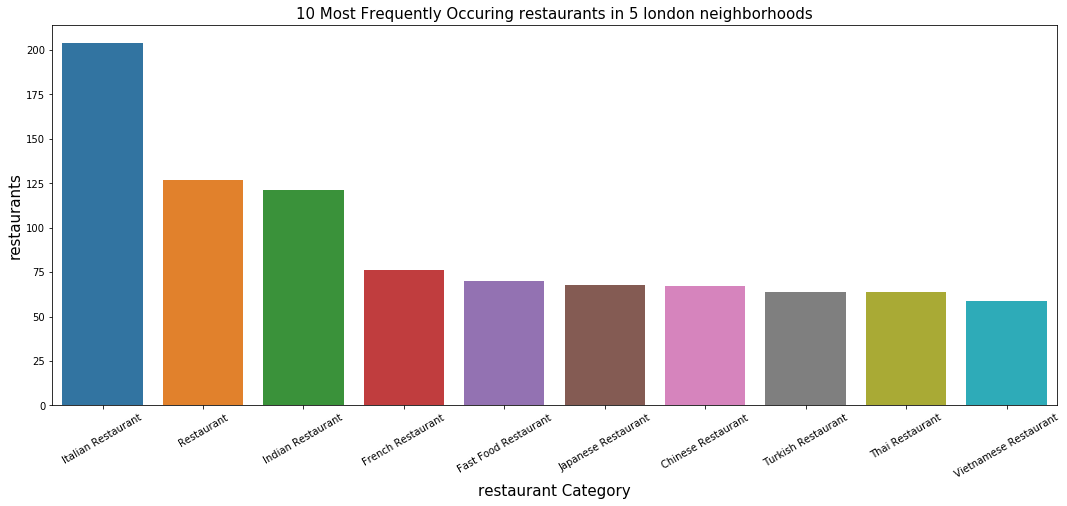

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=london_restaurants_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring restaurants in 5 london neighborhoods', fontsize=15)
plt.xlabel("restaurant Category", fontsize=15)
plt.ylabel ("restaurants", fontsize=15)
plt.savefig("Most_Freq_restaurants.png", dpi=300)
plt.show()

**now let's see top 5 venues in each neighborhood**

In [89]:
london_onehot=pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")
london_onehot['Neighborhood'] = london_venues['Neighborhood']
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]
london_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Xinjiang Restaurant,Yakitori Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
london_grouped=london_onehot.groupby('Neighborhood').mean().reset_index()

In [91]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [92]:

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

### Top 5 Venues in each neighborhood 


In [93]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acton,Pub,Gym / Fitness Center,Grocery Store,Hotel,Coffee Shop
1,Aldgate,Coffee Shop,Hotel,Cocktail Bar,Salad Place,Gym / Fitness Center
2,Aldwych,Theater,Burger Joint,Coffee Shop,Dessert Shop,Tea Room
3,Anerley,Grocery Store,Train Station,Convenience Store,Hardware Store,Gastropub
4,Angel,Pub,Coffee Shop,Café,Mediterranean Restaurant,Pizza Place


## Now we get the most common restaurant in every neighborhood:

In [94]:
london_onehot_rest=pd.get_dummies(london_restaurants[['Venue Category']], prefix="", prefix_sep="")
london_onehot_rest['Neighborhood'] = london_restaurants['Neighborhood']
fixed_columns = [london_onehot_rest.columns[-1]] + list(london_onehot_rest.columns[:-1])
london_onehot_rest = london_onehot_rest[fixed_columns]
london_onehot_rest.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Brazilian Restaurant,...,Szechuan Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Xinjiang Restaurant,Yakitori Restaurant
9,Acton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Acton,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13,Acton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,Acton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,Aldgate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
london_grouped_rest=london_onehot_rest.groupby('Neighborhood').mean().reset_index()

In [95]:
def return_most_common_restaurant(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
neighborhoods_rest_sorted = pd.DataFrame(columns=columns)
neighborhoods_rest_sorted['Neighborhood'] = london_grouped_rest['Neighborhood']

for ind in np.arange(london_grouped_rest.shape[0]):
    neighborhoods_rest_sorted.iloc[ind, 1:] = return_most_common_restaurant(london_grouped_rest.iloc[ind, :], num_top_venues)

In [103]:
neighborhoods_rest_sorted.head()

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant
0,Acton,Fast Food Restaurant,Thai Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Yakitori Restaurant
1,Aldgate,Thai Restaurant,Indian Restaurant,Restaurant,French Restaurant,Italian Restaurant
2,Aldwych,Restaurant,Seafood Restaurant,Sushi Restaurant,Italian Restaurant,French Restaurant
3,Anerley,Fast Food Restaurant,Yakitori Restaurant,English Restaurant,Falafel Restaurant,Filipino Restaurant
4,Angel,Mediterranean Restaurant,Korean Restaurant,Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant


**now we get the neighborhoods with italian as the most common**

In [105]:
neighborhoods_rest_sorted[neighborhoods_rest_sorted['1st Most Common Restaurant']=='Italian Restaurant']

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant
5,Archway,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Kebab Restaurant,Asian Restaurant
7,Barbican,Italian Restaurant,Vietnamese Restaurant,Sushi Restaurant,French Restaurant,English Restaurant
8,Barnes,Italian Restaurant,Thai Restaurant,Restaurant,Yakitori Restaurant,Greek Restaurant
10,Battersea,Italian Restaurant,Thai Restaurant,Chinese Restaurant,Portuguese Restaurant,Restaurant
12,Belgravia,Italian Restaurant,Restaurant,Indian Restaurant,French Restaurant,Seafood Restaurant
15,Blackfriars,Italian Restaurant,Restaurant,Falafel Restaurant,Seafood Restaurant,Japanese Restaurant
18,Bloomsbury,Italian Restaurant,Japanese Restaurant,Falafel Restaurant,Turkish Restaurant,Okonomiyaki Restaurant
22,Brompton,Italian Restaurant,Japanese Restaurant,French Restaurant,Tapas Restaurant,Mediterranean Restaurant
26,Castelnau,Italian Restaurant,French Restaurant,Indian Restaurant,Chinese Restaurant,Yakitori Restaurant
27,Catford,Italian Restaurant,Greek Restaurant,Japanese Restaurant,Portuguese Restaurant,Fast Food Restaurant


### the next step is to cluster the neighborhoods 

In [107]:

from sklearn.cluster import KMeans
# set number of clusters
kclusters =5
london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 4, 4, 2, 0, 0, 0, 4, 4, 0], dtype=int32)

In [112]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = london_df

london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
london_merged.shape # check the last columns!

(144, 14)

In [120]:
london_merged['Cluster Labels'] = london_merged['Cluster Labels'].fillna(0)
london_merged['Cluster Labels'] =   london_merged['Cluster Labels'].astype(int)
london_merged

,Neighborhood,Borough,Post_town,postcode,Dial Code,OS grid ref,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acton,"Ealing, Hammersmith and Fulham[3]",LONDON,"W3, W4",020,TQ205805,51.508140,-0.273261,2,Pub,Gym / Fitness Center,Grocery Store,Hotel,Coffee Shop
1,Aldgate,City[5],LONDON,EC3,020,TQ334813,51.514248,-0.075719,4,Coffee Shop,Hotel,Cocktail Bar,Salad Place,Gym / Fitness Center
2,Aldwych,Westminster[5],LONDON,WC2,020,TQ307810,51.512625,-0.118568,4,Theater,Burger Joint,Coffee Shop,Dessert Shop,Tea Room
3,Anerley,Bromley[6],LONDON,SE20,020,TQ345695,51.407599,-0.061939,2,Grocery Store,Train Station,Convenience Store,Hardware Store,Gastropub
4,Angel,Islington[3],LONDON,"EC1, N1",020,TQ345665,51.531946,-0.106106,0,Pub,Coffee Shop,Café,Mediterranean Restaurant,Pizza Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Whitechapel,Tower Hamlets,LONDON,E1,020,TQ335815,51.519579,-0.060691,2,Coffee Shop,Pub,Hotel,Indian Restaurant,Sandwich Place
140,Willesden,Brent,LONDON,NW10,020,TQ227846,51.546622,-0.235866,4,Pizza Place,Coffee Shop,Bakery,Hostel,Pet Store
141,Wimbledon,Merton,LONDON,"SW19, SW20",020,TQ239709,51.421479,-0.206403,2,Pub,Bar,Coffee Shop,Sushi Restaurant,Clothing Store
142,Woodford,Redbridge,LONDON,"IG8, E18",020,TQ405915,51.606806,0.034012,4,Metro Station,Rental Car Location,Gas Station,Chinese Restaurant,Pizza Place


## a map of london after clustering neighborhoods where every color represent a cluster

In [134]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12, width=800, height=600)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['latitude'], london_merged['longitude'], london_merged['Neighborhood'], london_merged['Cluster Labels']):
    cluster=round(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## First Cluster

In [139]:
london_merged.loc[london_merged['Cluster Labels'] ==0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Neighborhood,OS grid ref,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Angel,TQ345665,51.531946,-0.106106,0,Pub,Coffee Shop,Café,Mediterranean Restaurant,Pizza Place
5,Archway,TQ285875,51.565437,-0.134998,0,Coffee Shop,Pub,Grocery Store,Pizza Place,Café
6,Balham,TQ285735,51.442828,-0.151443,0,Coffee Shop,Pub,Pizza Place,Bakery,Indian Restaurant
9,Barnes,TQ225765,51.471896,-0.238744,0,Park,Pub,Food & Drink Shop,Platform,Track
10,Barnsbury,TQ305845,51.538935,-0.114735,0,Pub,Café,Gastropub,Park,Grocery Store
11,Battersea,TQ285765,51.470793,-0.172214,0,Pub,Bakery,Bus Stop,Hotel,Italian Restaurant
17,Blackheath,TQ395765,51.466318,0.008562,0,Pub,Café,Bakery,Pizza Place,Indian Restaurant
25,Camberwell,TQ325767,51.474571,-0.092542,0,Café,Grocery Store,Coffee Shop,Pub,Park
26,Canonbury,TQ325845,51.548524,-0.092983,0,Pub,Café,Bus Stop,Coffee Shop,Restaurant
27,Castelnau,TQ226776,51.482695,-0.237688,0,Café,Lake,French Restaurant,Chinese Restaurant,Nature Preserve


## Second cluster

In [140]:
london_merged.loc[london_merged['Cluster Labels'] ==1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Neighborhood,OS grid ref,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
39,Crossness,TQ480800,51.509037,0.138411,1,Mobile Phone Shop,History Museum,Ethiopian Restaurant,Event Space,Exhibit


## third cluster

In [142]:
london_merged.loc[london_merged['Cluster Labels'] ==2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Neighborhood,OS grid ref,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Acton,TQ205805,51.508140,-0.273261,2,Pub,Gym / Fitness Center,Grocery Store,Hotel,Coffee Shop
3,Anerley,TQ345695,51.407599,-0.061939,2,Grocery Store,Train Station,Convenience Store,Hardware Store,Gastropub
14,Bellingham,TQ375715,51.431081,-0.024515,2,Grocery Store,Café,Clothing Store,Gym,Supermarket
15,Bermondsey,TQ335795,51.497012,-0.063268,2,Brewery,Grocery Store,Pub,Park,Café
20,Bow,TQ365825,51.528309,-0.019482,2,Pub,Grocery Store,Metro Station,Bus Stop,Art Gallery
21,Brixton,TQ315755,51.456804,-0.116796,2,Coffee Shop,Caribbean Restaurant,Pub,Grocery Store,Vegetarian / Vegan Restaurant
22,Brockley,TQ365745,51.457833,-0.036087,2,Grocery Store,Convenience Store,Coffee Shop,Beer Store,Fish & Chips Shop
24,Brondesbury,TQ245845,51.544990,-0.202791,2,Pub,Indian Restaurant,Coffee Shop,Park,Grocery Store
28,Catford,TQ385735,51.445322,-0.019753,2,Grocery Store,Supermarket,Pub,Italian Restaurant,Coffee Shop
37,Colindale,TQ213897,51.591519,-0.256773,2,Supermarket,Fast Food Restaurant,Pub,Gym / Fitness Center,Chinese Restaurant


## Fourth cluster

In [138]:
london_merged.loc[london_merged['Cluster Labels'] ==3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Neighborhood,OS grid ref,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
29,Charlton,TQ415785,51.482605,0.036536,3,Grocery Store,Park,Bus Stop,Coffee Shop,Platform
32,Chinbrook,TQ411722,51.429449,0.033002,3,Platform,Business Service,Park,Fish & Chips Shop,Exhibit
43,Dulwich,TQ345725,51.441879,-0.084324,3,Café,Park,Rugby Pitch,Farm,Athletics & Sports
74,Kidbrooke,TQ415765,51.467573,0.028524,3,Train Station,Rugby Pitch,Café,Warehouse Store,Park
104,Plumstead,TQ445785,51.480463,0.092429,3,Park,Grocery Store,Convenience Store,Kebab Restaurant,Social Club
124,Stonebridge,TQ203839,51.597207,-0.050263,3,Park,Bus Stop,Train Station,Bus Station,Metro Station


## Fifth cluster

In [143]:
london_merged.loc[london_merged['Cluster Labels'] ==4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,Neighborhood,OS grid ref,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Aldgate,TQ334813,51.514248,-0.075719,4,Coffee Shop,Hotel,Cocktail Bar,Salad Place,Gym / Fitness Center
2,Aldwych,TQ307810,51.512625,-0.118568,4,Theater,Burger Joint,Coffee Shop,Dessert Shop,Tea Room
7,Bankside,TQ325795,51.355747,-0.082002,4,Women's Store,Forest,Athletics & Sports,Bed & Breakfast,Golf Course
8,Barbican,TQ322818,51.520150,-0.098683,4,Coffee Shop,Pub,Gym / Fitness Center,Food Truck,Hotel
12,Bayswater,TQ255805,51.512414,-0.187632,4,Hotel,Pub,Café,Chinese Restaurant,Coffee Shop
13,Belgravia,TQ275795,51.498213,-0.153500,4,Hotel,Café,Boutique,Italian Restaurant,Restaurant
16,Blackfriars,TQ318808,51.511585,-0.103767,4,Coffee Shop,Hotel,Pub,Scenic Lookout,Italian Restaurant
18,Blackwall,TQ385805,51.506500,-0.006402,4,Hotel,Bus Stop,Coffee Shop,Restaurant,Lounge
19,Bloomsbury,TQ305825,51.523126,-0.126066,4,Coffee Shop,Café,Exhibit,Bookstore,Park
23,Brompton,TQ275795,51.491822,-0.178326,4,Hotel,Bakery,Burger Joint,Exhibit,Ice Cream Shop
